In [45]:
import cv2
from ipywidgets import IntSlider, Image, Layout
from IPython.display import display

src = cv2.imread('C:/Users/YULA/Desktop/4.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#Component 선언
# IntSlider_Threshold = widgets.IntSlider(
#     value=1,
#     min=1,
#     max=50,
#     step=1,
#     description='Threshold: ',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d'
# )

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="45%")
wImg_dst = Image(layout = Layout(border="solid"), width="45%")
wImg_dst2 = Image(layout = Layout(border="solid"), width="45%")
wImg_dst3 = Image(layout = Layout(border="solid"), width="45%")

items = [wImg_original,wImg_dst]
items2 = [wImg_dst2,wImg_dst3]
Left_image =Box(items)
Right_image = Box(items2)
box = layout(IntSlider_Threshold,Left_image,Right_image)

tab_nest = widgets.Tab()
tab_nest.children = [box]
tab_nest.set_title(0, 'Fast Feature Detect1')
tab_nest

tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_original.value = tmpStream

display(tab_nest)

#Event 선언
threshold = 30
    
# def on_value_change_Threshold(change):
#     global threshold
#     threshold = change['new']
#     make_fastfeature(threshold)

def make_fastfeature(input_threshold):
    fastF = cv2.FastFeatureDetector.create(threshold = input_threshold)
    kp = fastF.detect(gray)
    dst = cv2.drawKeypoints(gray,kp,None,color=(0,0,255))
    print('len(kp)=',len(kp))

    fastF.setNonmaxSuppression(False)
    kp2 = fastF.detect(gray)
    dst2 = cv2.drawKeypoints(src,kp2,None,color=(0,0,255))
    print('len(kp2)=',len(kp2))

    dst3 = src.copy()
    points = cv2.KeyPoint_convert(kp)
    for cx,cy in points:
        cv2.circle(dst3,(cx,cy),3,color=(255,0,0),thickness=-1)
        
    tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
    wImg_dst.value = tmpStream
    
    tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
    wImg_dst2.value = tmpStream
    
    tmpStream = cv2.imencode(".jpeg", dst3)[1].tostring()
    wImg_dst3.value = tmpStream

#초기화 작업
make_fastfeature(threshold)

#Component에 Event 장착
# IntSlider_Threshold.observe(on_value_change_Threshold, names='value')

<ipython-input-45-00d14056a49f>:45: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tmpStream = cv2.imencode(".jpeg", src)[1].tostring()


len(kp)= 245
len(kp2)= 709


<ipython-input-45-00d14056a49f>:72: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(dst3,(cx,cy),3,color=(255,0,0),thickness=-1)
<ipython-input-45-00d14056a49f>:74: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
<ipython-input-45-00d14056a49f>:77: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
<ipython-input-45-00d14056a49f>:80: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tmpStream = cv2.imencode(".jpeg", dst3)[1].tostring()


des1.shape= (7824600, 1)
des2.shape= (7824600, 1)
des2= [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
des3.shape= (7824600, 1)
des3= [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


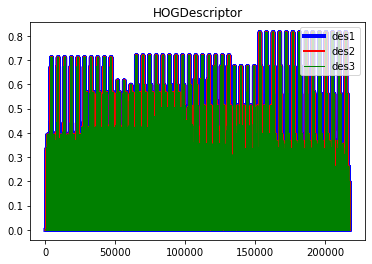

In [46]:
import matplotlib.pyplot as plt

src = cv2.imread('C:/Users/YULA/Desktop/33.png')

hog1 = cv2.HOGDescriptor()
des1 = hog1.compute(src)
print('des1.shape=',des1.shape)

winSize=(64,128)
blockSize = (16,16)
blockStride = (8,8)
cellSize=(8,8)

nbins = 9
derivAperture = 1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradient = False
hog2 = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,
                        derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,
                         gammaCorrection,nlevels,signedGradient
                        )
des2 = hog2.compute(src)
print('des2.shape=',des2.shape)
print('des2=',des2)

gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
des3 = hog1.compute(gray)
print('des3.shape=',des3.shape)
print('des3=',des3)

plt.title('HOGDescriptor')
plt.plot(des1[::36],color='b',linewidth=4,label='des1')
plt.plot(des2[::36],color='r',linewidth=2,label='des2')
plt.plot(des3[::36],color='g',linewidth=1,label='des3')
plt.legend(loc='best')
plt.show()

len(loc1)= 0
len(loc2)= 2
len(loc3)= 4


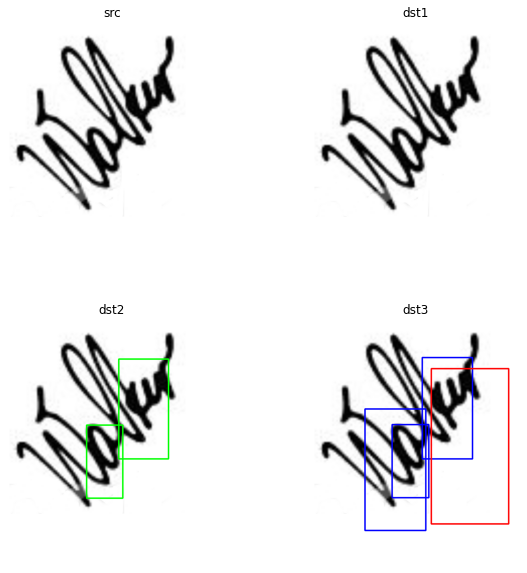

In [47]:
src = cv2.imread('C:/Users/YULA/Desktop/33.png')
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

loc1,weights1 = hog.detect(src)
print('len(loc1)=',len(loc1))
dst1 = src.copy()
w,h = hog.winSize
for pt in loc1:
    x,y = pt
    cv2.rectangle(dst1,(x,y),(x+w,y+h),(255,0,0),2)

dst2 = src.copy()
loc2,weights2 = hog.detectMultiScale(src)
print('len(loc2)=',len(loc2))
for rect in loc2:
    x,y,w,h = rect
    cv2.rectangle(dst2,(x,y),(x+w,y+h),(0,255,0),2)
    
dst3 = src.copy()
loc3,weights3 = hog.detectMultiScale(src,winStride=(1,1),padding=(8,8))
print('len(loc3)=',len(loc3))
for i,rect in enumerate(loc3):
    x,y,w,h = rect
    if weights3[i] > 0.7:
        cv2.rectangle(dst3,(x,y),(x+w,y+h),(0,0,255),2)
    else:
        cv2.rectangle(dst3,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.figure(figsize=(10,10))
imgae=plt.subplot(2,2,1)
plt.axis('off')
plt.title('src')
plt.imshow(src)

imgae=plt.subplot(2,2,2)
plt.axis('off')
plt.title('dst1')
plt.imshow(dst1)

imgae=plt.subplot(2,2,3)
plt.axis('off')
plt.title('dst2')
plt.imshow(dst2)

imgae=plt.subplot(2,2,4)
plt.axis('off')
plt.title('dst3')
plt.imshow(dst3)

plt.show()